# Pandas and Data Imputation - Exercises Lesson 8 (28/03/2025)

In [ ]:
import pandas as pd
import numpy as np
pd.__version__

## Strings

In [ ]:
titanic = pd.read_csv("https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/titanic.csv")

You can make all name characters lowercase.


In [ ]:
titanic.head()





To make each of the strings in the Name column lowercase, select the *Name* column, add the *str* accessor and apply the lower method. As such, each of the strings is converted element-wise.

Similar to datetime objects in the time series section having a dt accessor, a number of specialized string methods are available when using the str accessor. 

In [ ]:
titanic["Name"].str.lower()

## Exercise 0 - Create a new column Surname that contains the surname of the passengers by extracting the part before the comma. And one column to keep only the name.

## Exercise 0.1 - Extract rows with the word "Countess" in the surname or name

## Pandas for Time-Series

Pandas offers a wide ranges of operations to store and handle time-series:

* a datetime type, to track the time-series observation times
* resampling approaches to change time-series frequency
* rolling operations


In [ ]:
stock = pd.read_csv("https://raw.githubusercontent.com/rashida048/Datasets/refs/heads/master/stock_data.csv", sep=",")

In [ ]:
stock

we can create a datatime index to associate each observation to a specific time!



In [ ]:
## Save the Date into a new column
stock["Date"] = pd.to_datetime(stock["Date"])

## Print
stock

In [ ]:
stock[stock["Date"] == "2017-12-27"]

By using Timestamp objects for dates, a lot of time-related properties are provided by pandas. For example the month, but also year, quarter,… All of these properties are accessible by the dt accessor.

In [ ]:
stock[stock["Date"].dt.month == 2]

You can use resampling approaches to change the data frequencies, from daily to a year frequency for example

In [ ]:
## In this case the Date should be set as index 
stock.index = stock["Date"]

# Resample to (M) monthly frequency
stock_monthly = stock.resample('Y').last()  ## can be max, min, etc..

#Print
stock_monthly[["Open", "High", "Low", "Close"]]

In [ ]:
stock_monthly[["Open", "High", "Low", "Close"]].plot()

You can compute moving averages and rolling operations

In [ ]:
stock_monthly['3year_avg'] = stock_monthly['Close'].rolling(window=3).mean()
stock_monthly

## Exercise 1 - Bollinger Bands

A **Bollinger Band®** is a technical analysis tool defined by a set of **trendlines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA)** of a security's price, but which can be adjusted to user preferences. Bollinger Bands® were developed and copyrighted by the famous technical trader John Bollinger, designed to  identify when an asset is oversold or overbought. Many traders believe the closer the prices move to the upper band (UB), the more overbought the market is, and the closer the prices move to the lower band, the more oversold the market is <a href="https://www.investopedia.com/terms/b/bollingerbands.asp">[1]</a>.

**Step 1** consists in reading the whole stock dataset, computing and plotting (optional) the Bollinger bands of the close price, using a moving average (20 days window size). In particular, we want to compute:
- The moving average MA(20): is the simple moving average (SMA) of the close price in the last 20 days. 
- The SD(20): is standard deviation (SD) of the closing prices in the last 20 days. 
- Upper bound UB(20): is the sum of the 20-period SMA and two times the 20-period standard deviation (SD) of the closing prices.
- Lower Band LB(20): is the 20-period SMA minus two times the 20-period SD of the closing prices.

Some traders believe that: when the close price moves above the upper band (UB), the market is overbought (maybe we should sell). While more the prices move to the lower band, the more oversold the market is (maybe we should buy).

The strategy looks similar to this:
<img src="https://raw.githubusercontent.com/matteoprata/AI4Trading/598b3037c9dcd6282a9f3f12acbb9da9aa2f7ec3/data/press_images/signals_by_boil.svg"/>

**Tasks 2** consists in identifying potential buying and selling opportunities according to this strategy, and create a new column with buy and sell.

To implement Bollinger bands you may want to use: _rolling mean_, _rolling standard deviation_, _arrays operations and indexing_, _dataframe plotting_. 

Additional material:
- https://www.investopedia.com/terms/b/bollingerbands.asp
- https://www.bollingerbands.com/bollinger-band-rules
- https://www.iforex.in/bollinger-bands


*Disclaimer:*
- This code is for example and teaching purposes only. Do not use this to make any real trades in financial markets.

### Plot with pandas

* The .plot.* methods are applicable on both Series and DataFrames
* By default, each of the columns is plotted as a different element (line, boxplot,..)
* Any plot created by pandas is a Matplotlib object

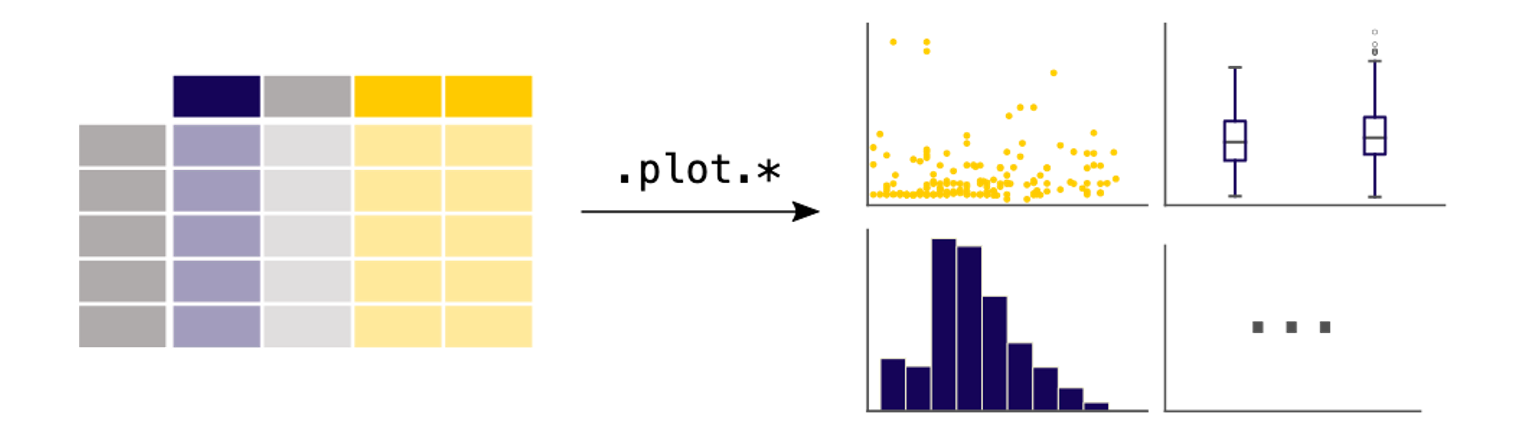


In [ ]:
stock["Close"].plot()

## Group by: split-apply-combine

By “group by” we are referring to a process involving one or more of the following steps:

* **Splitting** the data into groups based on some criteria.

* **Applying** a function to each group independently.

* **Combining** the results into a data structure.


In [ ]:
speeds = pd.DataFrame(
    [
        ("bird", "Falconiformes", 389.0),
        ("bird", "Psittaciformes", 24.0),
        ("mammal", "Carnivora", 80.2),
        ("mammal", "Primates", 20.0),
        ("mammal", "Carnivora", 58),
    ],
    index=["falcon", "parrot", "lion", "monkey", "leopard"],
    columns=("class", "order", "max_speed"),
)

In [ ]:
speeds

In [ ]:
grouped = speeds.groupby("class").max()
grouped

## Exercise 2 

You are given a dataset of stock transactions containing the following columns:  

- **Date**: The date of the transaction  
- **Trader**: The name of the trader  
- **Stock**: The stock ticker symbol (e.g., AAPL, TSLA)  
- **Quantity**: Number of shares traded  
- **Price**: Price per share at the time of trade  

Your task is to analyze this dataset using `groupby` to answer the following:  

1. Compute the **total traded value** (Quantity × Price) for each **trader and stock combination**.  
2. For each trader, find the **stock they traded the most (highest quantity)**.  
3. Compute the **average price per stock** but only for traders who traded at least 10,000 shares in total.  
4. Find the **top 3 traders** with the highest total traded value.  


In [ ]:
import pandas as pd
import numpy as np

# Sample dataset
data = {
    "Date": pd.date_range(start="2024-01-01", periods=20, freq="D"),
    "Trader": np.random.choice(["Alice", "Bob", "Charlie", "David"], size=20),
    "Stock": np.random.choice(["AAPL", "TSLA", "GOOG", "AMZN"], size=20),
    "Quantity": np.random.randint(100, 5000, size=20),
    "Price": np.random.uniform(100, 500, size=20),
}

df = pd.DataFrame(data)
df

## Exercises 3 - reconstruct the first 100 Steps of Open using your preferred approach

In [ ]:

# Generate missnig values (25%)
np.random.seed(232)
stock_miss = stock.copy()
stock_miss['is_na_mask'] = np.random.binomial(n=1, p=0.25, size=stock_miss.shape[0]).astype('bool')*2000 #multiply by 2000 so lines visible in plot later
stock_miss = stock_miss.assign(Open_na = lambda x: np.where(x['is_na_mask'], np.nan, x['Open'])) 

stock_miss[["Open_na"]][:100].plot() 

## Exercises 4 : reconstruct the volume feature using your preferred approach

In [ ]:
### sample missing value on Open 

# Generate missnig values (25%)
np.random.seed(232)
stock_miss = stock.copy()
stock_miss['is_na_mask'] = np.random.binomial(n=1, p=0.25, size=stock_miss.shape[0]).astype('bool')*2000 #multiply by 2000 so lines visible in plot later
stock_miss = stock_miss.assign(Volume_na = lambda x: np.where(x['is_na_mask'], np.nan, x['Volume'])) 

stock_miss[["Volume_na"]][:100].plot() 

## Exercise 5: Imputation for Stock Market Data

Now let's focus on the whole multi-variate dataset:

Some values are missing due to data corruption or transmission delays. Your goal is to **handle missing values logically while keeping the dataset valid**.

### **Your Tasks**
1. **Identify Missing Values**  
   - Print the number of missing values per column.  
   - Determine which year have the most missing values.  

2. **Impute the Missing Values with Full Flexibility**  
   - You can use **any method** (mean, median, forward-fill, backward-fill, rolling window, interpolation, etc.) for:
     - `Open`
     - `Close`
     - `Volume`  
   - The only requirement:  
     - Ensure that `Low ≤ High` (swap values if necessary).  




In [ ]:
stock

In [ ]:
# Generate missnig values (25%)
np.random.seed(232)
stock_miss = stock[["Open", "High", "Low", "Close", "Volume"]].copy()
## add missing value to all columns 
for col in  stock_miss.columns:
    stock_miss[col] = np.where(np.random.binomial(n=1, p=0.25, size=stock_miss.shape[0]).astype('bool')*2000, np.nan, stock_miss[col])

stock_miss[:100][["Open","High", "Low", "Close"]].plot() 


In [ ]:
## volume
stock_miss[:100][["Volume"]].plot() 


## Exercise 7 : Given the following googl stock, please remove all rows that are a Saturday or a Sunday. Then compute: 1) the avgs close prices on Friday; 2) the avg differences between Friday close price and the close price on the next monday.

In [ ]:

googl = pd.read_csv("https://raw.githubusercontent.com/jsyoon0823/TimeGAN/master/data/stock_data.csv", sep=",")
# Create a datetime index based on the length of the DataFrame (NOTE: this should not include sundays and saturdays).
date_range = pd.date_range(start='2001-01-01', periods=len(googl), freq='D')

## Save the Date into a new column
googl["Date"] = date_range

googl

## Exercise 6 : For titanic Age (univariate data) design an algorithm to impute by sampling the top N most frequent values

## Pandas performance

How to use pandas at the top of its performance.



In [ ]:
N = 10**5
A_list = np.random.randint(1, 100, N)
B_list = np.random.randint(1, 100, N)
df = pd.DataFrame({'A': A_list, 'B': B_list})
df.head()

Let's suppose that we want to divide the column A by column B:  

In [ ]:
%%time
## First approach
df["C"] = np.nan
for _, row in df.iterrows():
    df["C"] = df["A"] / df["B"]
df

In [ ]:
%%time
## Apply approach
df["C"] = df.apply(lambda row: row["A"] / row["B"], axis=1)
df

In [ ]:
%%time
df["A"] / df["B"]
df

## Saving and Loading times highly change wrt different file format:

Let's do some examples.


In [ ]:
N = 10**8
A_list = np.random.randint(1, 100, N)
B_list = np.random.randint(1, 100, N)
C_list = np.random.randint(1, 100, N)
df = pd.DataFrame({'A': A_list, 'B': B_list})
len(df)

In [ ]:
%%time
df.to_csv("df.csv")

In [ ]:
%%time
df = pd.read_csv("df.csv")

In [ ]:
%%time
df.to_hdf('data.h5', key='df', mode='w')  

In [ ]:
%%time
df = pd.read_hdf('data.h5', 'df') 

In [ ]:
%%time
df.to_parquet('df.parquet')  

In [ ]:
%%time
df = pd.read_parquet('df.parquet')

# References:

- https://pandas.pydata.org/docs/getting_started/
- https://pandas.pydata.org/community/ecosystem.htmlik
- https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
- https://towardsdatascience.com/the-best-format-to-save-pandas-data-414dca023e0d
